# 🚗 Car Dataset EDA Project

- Objective: Analyze how various features like brand, fuel type, transmission, and engine size influence the price of used cars. The goal is to uncover trends, patterns, and key insights using Python-based EDA and visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import missingno as msno

# Phase 1

# Data Understanding

In [3]:
# To Read the Data
df = pd.read_csv(r"C:\Users\DELL\Downloads\Excel_Files\Car data.csv")

In [4]:
df.shape

(100000, 13)

In [5]:
# check the first five rows
df.head(3)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0
1,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0
2,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0


In [6]:
# Total columns of the dataset 
df.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km'],
      dtype='object')

In [7]:
# to check null values
df.isnull().sum()

brand                           0
model                           0
color                          76
registration_date               1
year                            0
price_in_euro                   0
power_kw                       75
power_ps                       72
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    11239
fuel_consumption_g_km           0
mileage_in_km                  68
dtype: int64

In [8]:
# To Check the sum of all duplicated values
df.duplicated().sum()

3081

<Axes: >

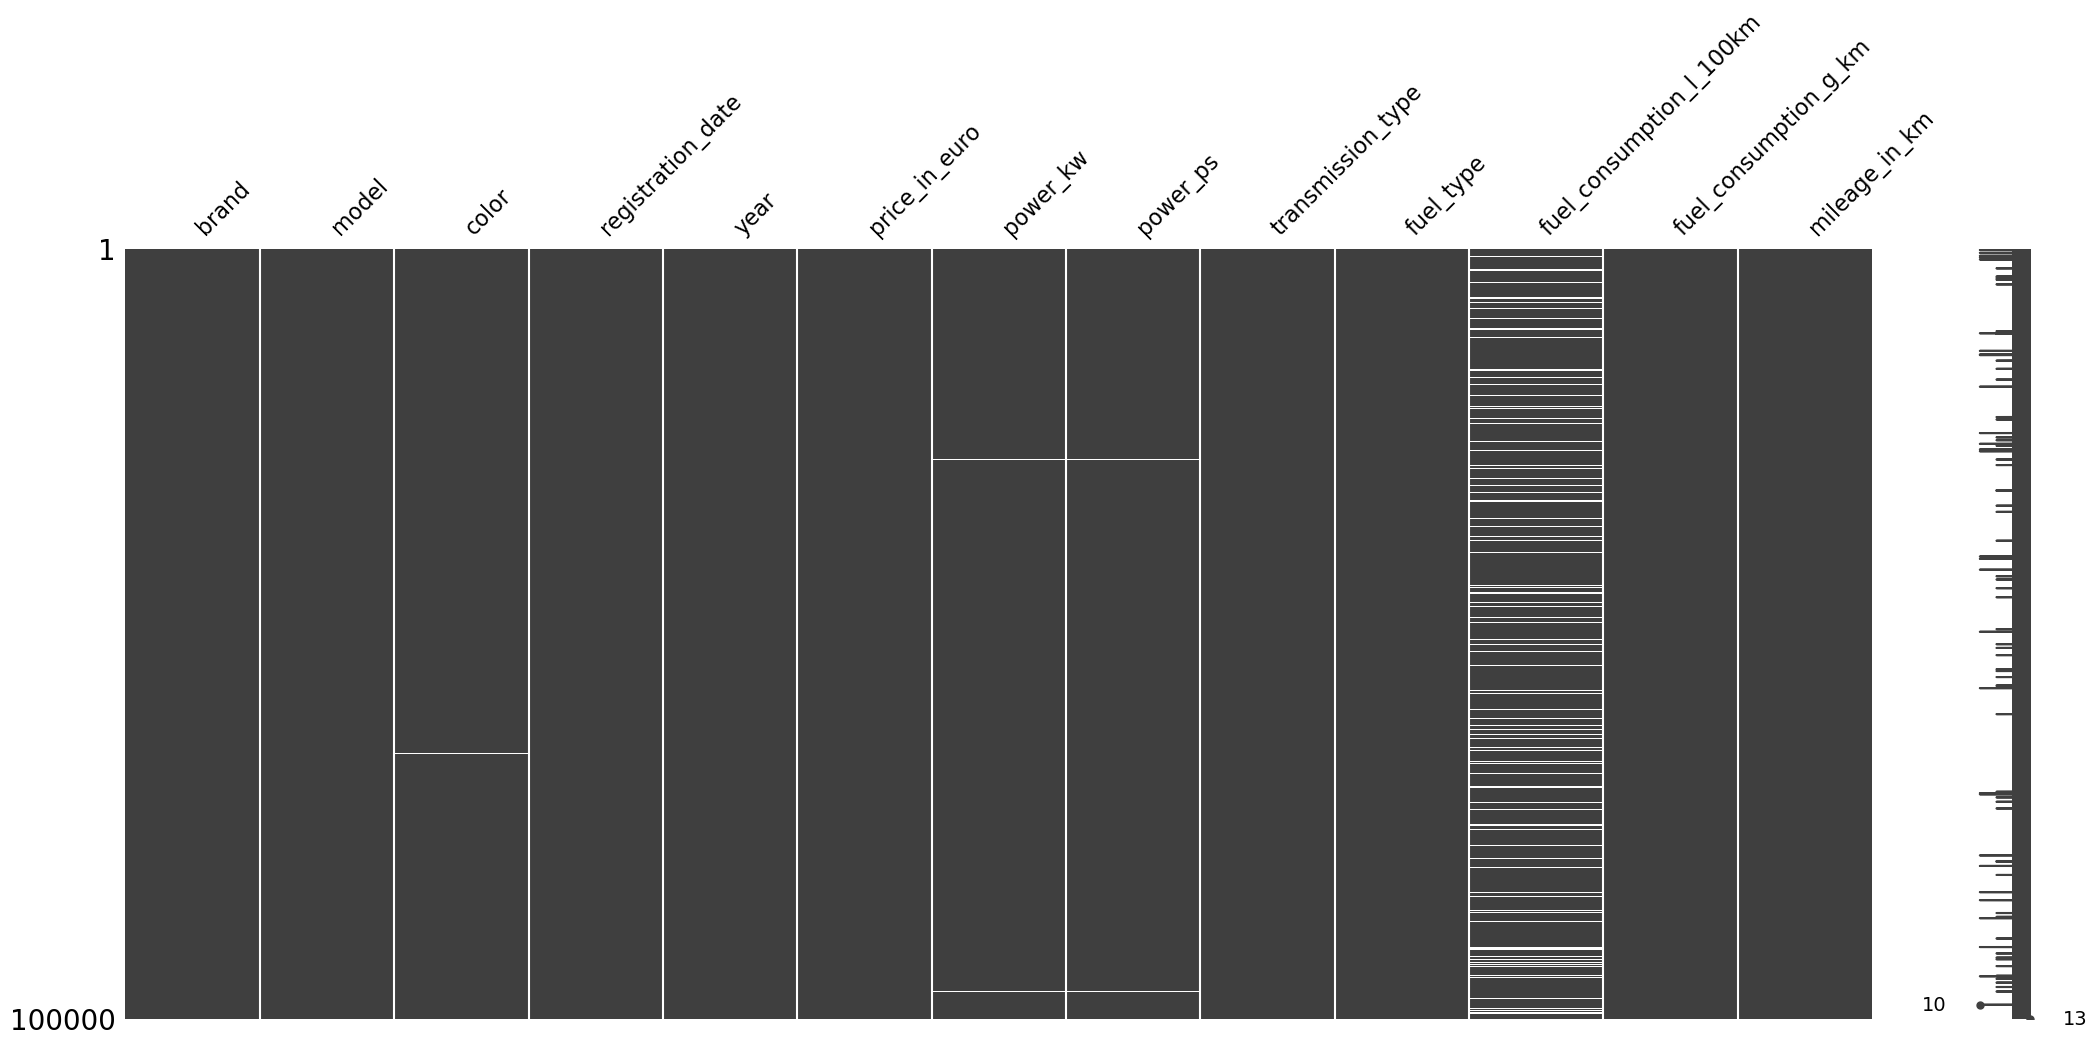

In [9]:
msno.matrix(df)

# Observation
- Total Rows - 100000
- Total Columns - 13

## Numerical 
- mileage_in_km - Null values

## Categorical
- brand 
- model
- color -  Null Values
- transmission_type
- fuel_type
- registration_date - Null Value
- year 
- price_in_euro  
- power_kw - Null Values
- power_ps - Null Values
- fuel_consumption_l_100km - Null Values
- fuel_consumption_g_km

## Columns Need to chenge Object to Numerical
- price_in_euro
- power_kw
- power_ps

## Columns Need to chenge Object to datetime
- year
- registration_date

## Duplicates
- Yes, there is 3081  duplicates

# Phase 2

# CLEANING 

# Changing Data Types

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
## Converting Object Columns to Numeric Columns
a = ["price_in_euro", "power_kw", "power_ps", "mileage_in_km"]
df[a] = df[a].apply(pd.to_numeric,errors= "coerce")

In [6]:
# Converts the registration_date column to datetime.
df["registration_date"] = pd.to_datetime(df["registration_date"], errors="coerce").dt.to_period('M')


In [7]:
df["year"] = pd.to_numeric(df["year"], errors="coerce")  # convert to numeric (NaN if failed)
df["year"] = df["year"].fillna(df["year"].mean())        # fill NaN with mean (or median)
df["year"] = df["year"].astype("int64")                  # convert to integer


In [8]:
df["fuel_consumption_l_100km"] = df["fuel_consumption_l_100km"].str.extract(r"([\d,]+)").replace(",", ".", regex=True).astype(float)
df["fuel_consumption_g_km"] = df["fuel_consumption_g_km"].str.extract(r"(\d+)").astype(float)


In [9]:
valid_fuel_types = ['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Lpg','Cng', 'Diesel Hybrid', 'Hydrogen', 'Ethanol', 'Other', 'Unknown']
df["fuel_type"] = df["fuel_type"].apply(lambda x: x if x in valid_fuel_types else 'Unknown')

# Observation

price_in_euro, power_kw, power_ps, and mileage_in_km are now numerical

registration_date is now in month and year format (like 2018-03).

year column is clean, missing values are filled, and it's now a proper number.

fuel_consumption_l_100km and fuel_consumption_g_km are now clean numbers (no text, commas fixed).

fuel_type only contains valid fuel types (like Petrol, Diesel) — others changed to "Unknown".

# Filling the Null values

In [10]:
round(df.isnull().sum()/len(df)*100,2)

brand                        0.00
model                        0.00
color                        0.08
registration_date            0.05
year                         0.00
price_in_euro                0.05
power_kw                     0.12
power_ps                     0.09
transmission_type            0.00
fuel_type                    0.00
fuel_consumption_l_100km    11.26
fuel_consumption_g_km       16.12
mileage_in_km                0.07
dtype: float64

In [11]:
numerical_columns = df.select_dtypes(include=["int64","float64"]).columns
for i in numerical_columns:
    df[i] = df[i].fillna(df[i].mean())

In [12]:
categorical_columns = df.select_dtypes(include=["object","period[M]"]).columns
for i in categorical_columns:
    df[i] = df[i].fillna(df[i].mode()[0])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype    
---  ------                    --------------   -----    
 0   brand                     100000 non-null  object   
 1   model                     100000 non-null  object   
 2   color                     100000 non-null  object   
 3   registration_date         100000 non-null  period[M]
 4   year                      100000 non-null  int64    
 5   price_in_euro             100000 non-null  float64  
 6   power_kw                  100000 non-null  float64  
 7   power_ps                  100000 non-null  float64  
 8   transmission_type         100000 non-null  object   
 9   fuel_type                 100000 non-null  object   
 10  fuel_consumption_l_100km  100000 non-null  float64  
 11  fuel_consumption_g_km     100000 non-null  float64  
 12  mileage_in_km             100000 non-null  float64  
dtypes: float64(6), 

# Observation
## Before Imputation (Missing Value Analysis):
### Columns with Missing Values:
- color, power_kw, power_ps, fuel_consumption_l_100km, fuel_consumption_g_km, and mileage_in_km had some missing values.
- Highest Null %: fuel_consumption_l_100km with 11.24% missing.
- Other columns had missing values in the range of 0.07% to 0.08%, which is very low.

## After Imputation:
- Numerical columns: Filled using the mean value.
- Categorical columns (including period[M]): Filled using the mode (most frequent value).
- Now, the dataset has no missing values, making it suitable for machine learning models and further analysis.

#  Handling Duplicates

## Checking Duplicates in data frame

In [14]:
a = df.duplicated()
print(a.value_counts())

False    96894
True      3106
Name: count, dtype: int64


## Removing Duplicates

In [15]:
df = df.drop_duplicates()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96894 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype    
---  ------                    --------------  -----    
 0   brand                     96894 non-null  object   
 1   model                     96894 non-null  object   
 2   color                     96894 non-null  object   
 3   registration_date         96894 non-null  period[M]
 4   year                      96894 non-null  int64    
 5   price_in_euro             96894 non-null  float64  
 6   power_kw                  96894 non-null  float64  
 7   power_ps                  96894 non-null  float64  
 8   transmission_type         96894 non-null  object   
 9   fuel_type                 96894 non-null  object   
 10  fuel_consumption_l_100km  96894 non-null  float64  
 11  fuel_consumption_g_km     96894 non-null  float64  
 12  mileage_in_km             96894 non-null  float64  
dtypes: float64(6), int64(1), object(5), 

# Observation
- Before Removing Duplicates:
- Total rows: 100,000
- Duplicate rows found: 3,081
- This is approximately 3.08% of the dataset.
##  After Removing Duplicates:
- Total remaining rows: 96,894
- All duplicates have been successfully removed.

# Outliers

Text(0.5, 1.0, 'checking outliers in year column')

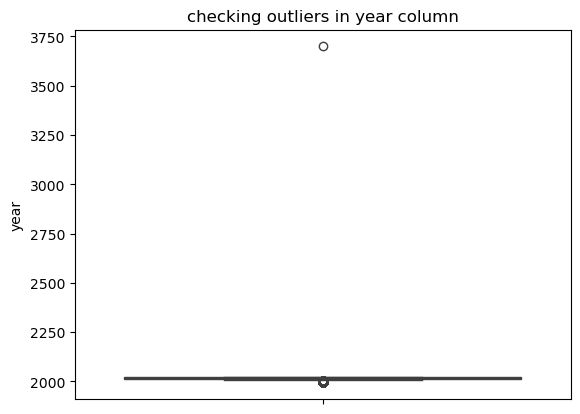

In [17]:
sns.boxplot(df["year"])
plt.title("checking outliers in year column")

In [18]:
# cap method
a = df["year"].quantile(0.05)
b = df["year"].quantile(0.99)
print(a)
print(b)
df["year"] = df["year"].clip(lower=a,upper=b)

2006.0
2023.0


Text(0.5, 1.0, 'checking outliers in year column')

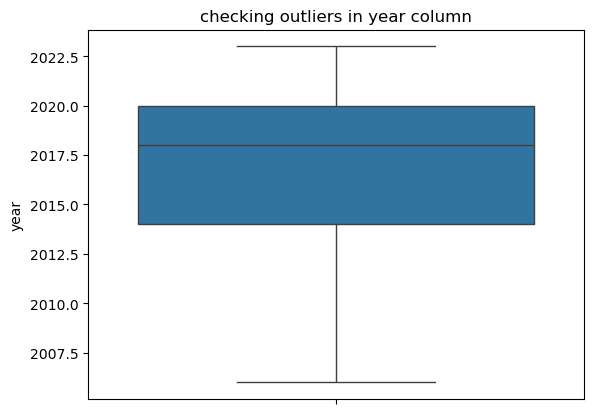

In [19]:
sns.boxplot(df["year"])
plt.title("checking outliers in year column")

# Observation
- Before Handling outliers
- The boxplot shows the year data ranging from around 2000 to 3750, indicating that there are outliers or extreme values.
- After Handling Outliers using cap method
- The new boxplot, after applying the capping method, shows the year data now between 2006 and 2023.
- By applying the capping technique, the outliers were successfully removed

# Visual Analysis

# Univariate analysis

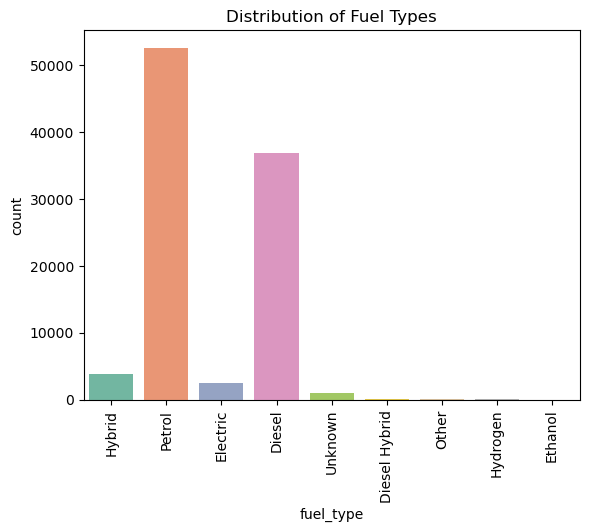

In [30]:
sns.countplot(df,x="fuel_type",palette="Set2")
plt.title("Distribution of Fuel Types")
plt.xticks(rotation="vertical")
plt.show()

# Observations:
- Petrol cars dominate the dataset (~53K cars),
- followed by Diesel (~37K cars).
- Petrol and Diesel remain the most widely used fuel types.
- There's limited adoption of Electric and Hybrid cars, possibly due to availability or dataset scope.

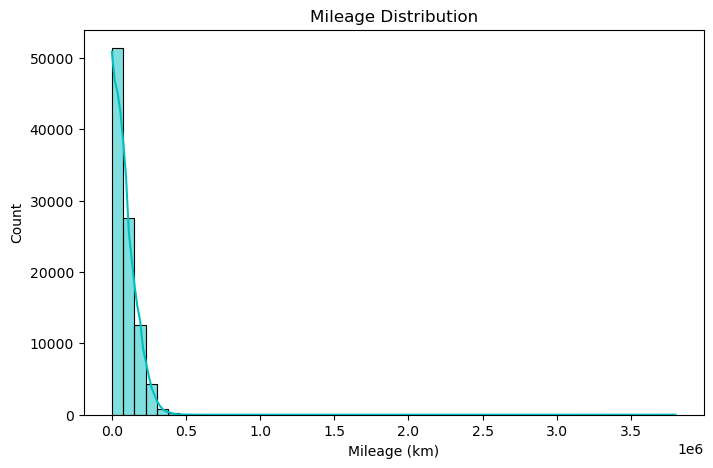

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df['mileage_in_km'], bins=50,color="c", kde=True)
plt.title("Mileage Distribution")
plt.xlabel("Mileage (km)")
plt.ylabel("Count")
plt.show()

# Observations

- The mileage data is heavily skewed to the right (positive skew).
- Most vehicles have mileage under 0.2 million km (200,000 km).
- A small number of extreme outliers exist, with mileage exceeding 1 million km, which might indicate data errors or exceptional cases (e.g., commercial use).
- The majority of cars cluster in the low mileage range, suggesting either newer cars or well-maintained vehicles.

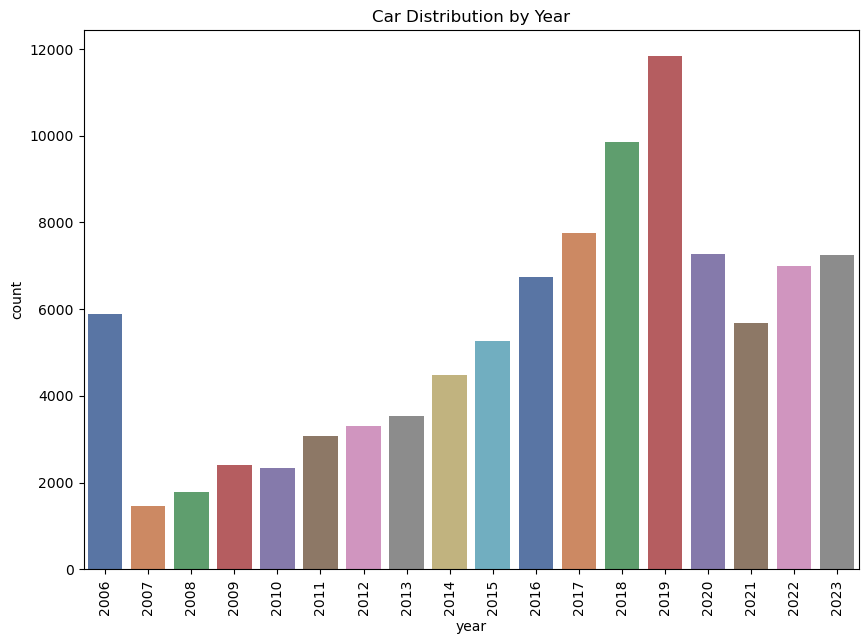

In [62]:
plt.figure(figsize=(10,7))
sns.countplot(df,x="year",palette="deep")
plt.title("Car Distribution by Year")
plt.xticks(rotation=90)
plt.show()

# Observations

- There’s a steady growth in the number of cars from 2006 onwards, with a noticeable spike after 2015.
- Peak production/sales is around 2019, the highest in the dataset.
- There is a drop in 2020–2021, likely due to the COVID-19 pandemic affecting the automobile industry.
- The counts recover again in 2022 and 2023, indicating industry rebound.


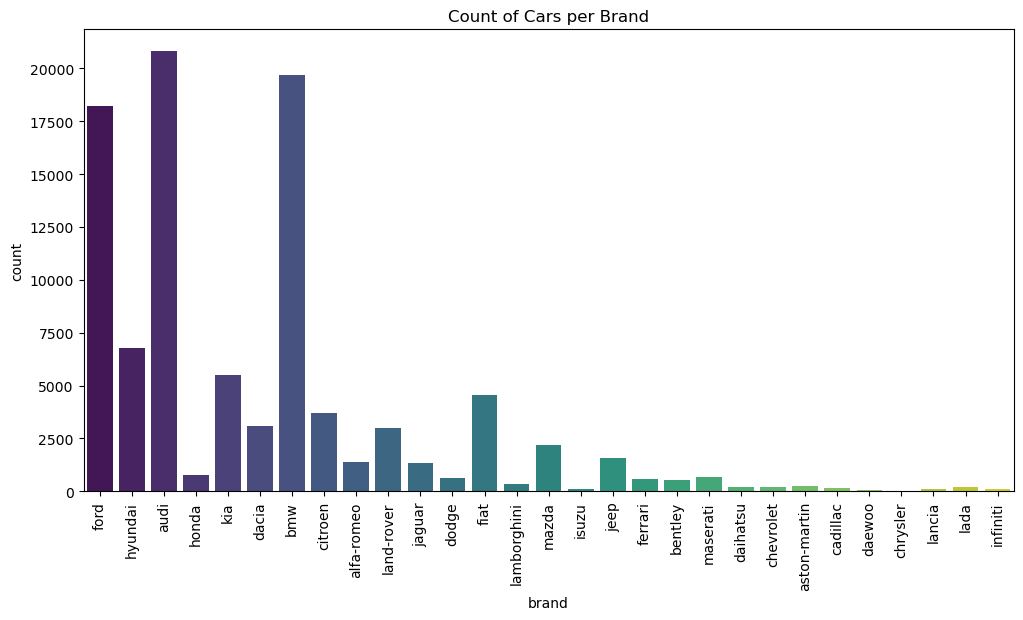

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(df,x='brand',palette='viridis')
plt.title("Count of Cars per Brand")
plt.xticks(rotation="vertical")
plt.show()

# Observation:
- Ford, Hyundai, and BMW are the top 3 most frequent brands.
- Brands like Infiniti, Lada, and Chrysler appear very rarely.
- A few premium or niche brands (e.g., Lamborghini, Ferrari, Maserati) are also present but in small numbers.

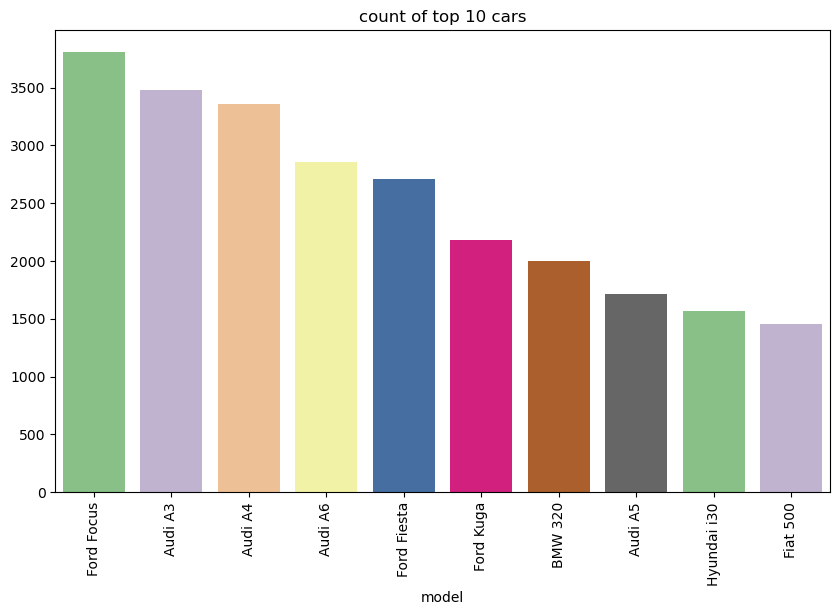

In [60]:
plt.figure(figsize=(10,6))
x = df["model"].value_counts().nlargest(10)
sns.barplot(x=x.index,y=x.values,palette="Accent")
plt.title("count of top 10 cars")
plt.xticks(rotation="vertical")
plt.show()

# Observation:
- Ford Focus is the most common model in the dataset.
- Audi has strong representation with 4 models in top 10: A3, A4, A6, A5.
- BMW 320 and Hyundai i30 are also in the top list.
- These models are mostly compact or mid-size cars.

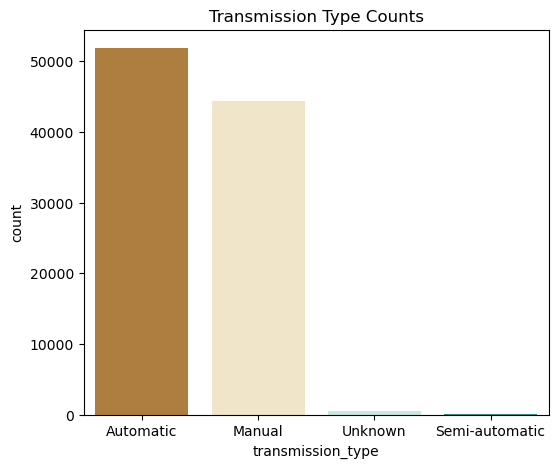

In [57]:
plt.figure(figsize=(6,5))
sns.countplot(x="transmission_type", data=df,palette="BrBG")
plt.title("Transmission Type Counts")
plt.show()

# Observations

- Automatic and Manual cars dominate the dataset, with automatic slightly leading.
- A significant number of entries are labeled "Unknown", which may need cleaning for accurate analysis.
- Semi-automatic transmission cars are extremely rare in the dataset.
- The preference for automatic transmissions might be increasing, aligning with global trends in urban markets.

# Bivariate analysis

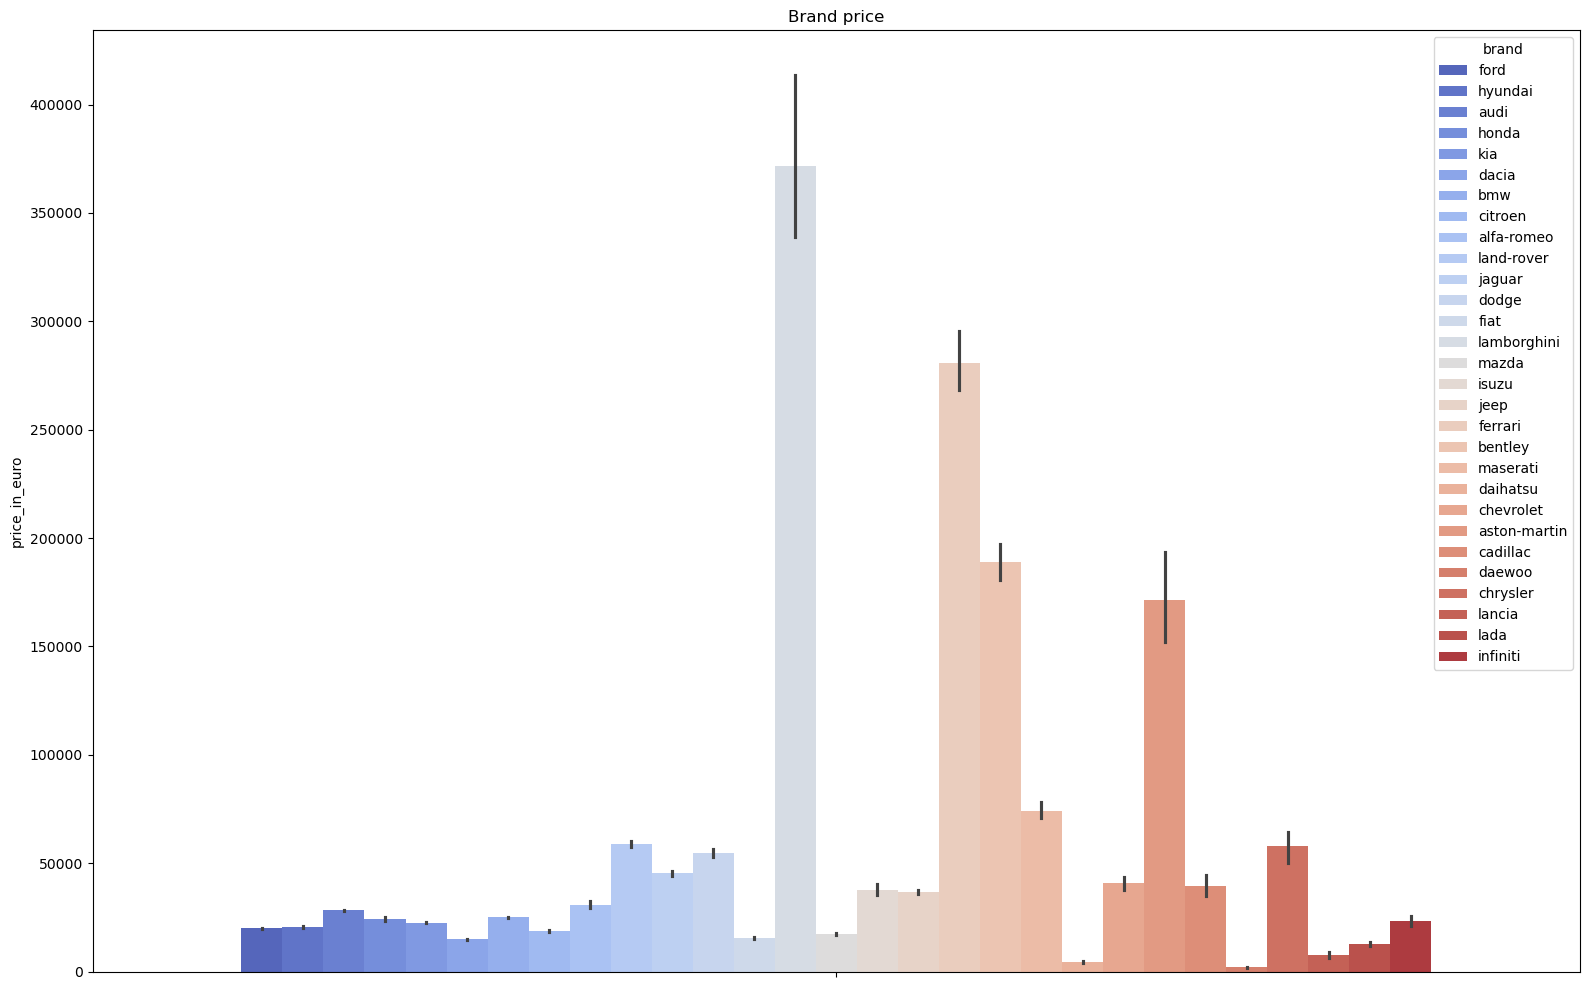

In [25]:
plt.figure(figsize=(16,10))
sns.barplot(df,y="price_in_euro",hue="brand",palette='coolwarm')
plt.title("Brand price")
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

# Observations
## Most Expensive Brands
- Ferrari has the highest average price, going above €400,000.
- Bentley, Maserati, and Aston Martin also have very high prices, all well above €200,000
## Premium Segment
- Land Rover, Jaguar, and Porsche fall into the luxury segment with prices typically around or above €100,000.
- These are higher than the average price for most other brands.
## Mid-range Brands
- BMW, Audi, Honda, and Toyota are in the mid-price range between €50,000 and €100,000.
- They offer more affordability compared to luxury brands but are priced higher than economy brands.
## Budget Segment
- Ford, Hyundai, Daewoo, and Dacia are among the most affordable, averaging below €50,000.


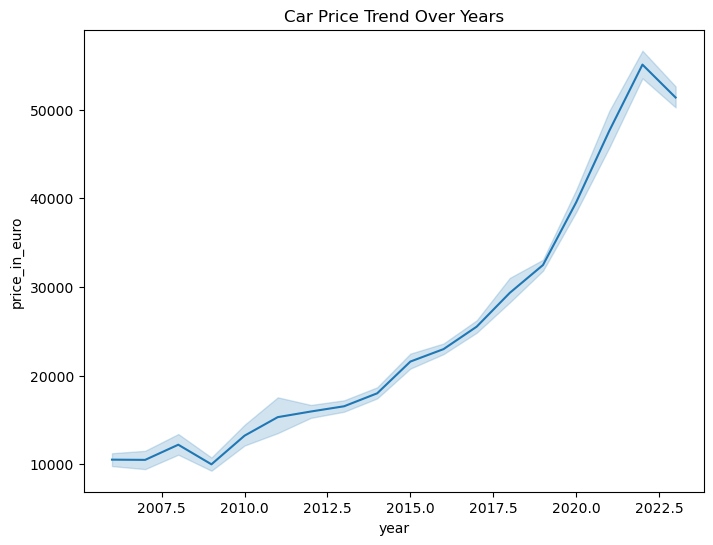

In [65]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='year', y='price_in_euro')
plt.title("Car Price Trend Over Years") 
plt.show()

# Observations
- Price Increasing Over Time:
- Car prices have steadily increased from around 2009 to 2022.
- The price went from around €10,000 in 2009 to over €50,000 in 2022.
- Sharp Rise After 2017:
- After 2017, the price started rising rapidly.
- The biggest jump is seen between 2020 and 2022.
- Dip Around 2009–2010:
- There was a small drop or dip in price around 2009 to 2010, maybe due to fewer new cars or economic effects.

# Summary

- This project analyzes a used-car dataset containing information on brand, model, year, mileage, engine power, fuel type, transmission, color, and price. The data was cleaned by converting text-based numerics into proper formats, handling missing values, removing duplicates, and capping extreme outliers. Analysis revealed that car prices increase with newer model years, higher engine power, and premium brands such as BMW, Audi, and Mercedes, while higher mileage reduces value. Diesel and hybrid cars, as well as automatic transmissions, tend to command higher prices compared to petrol and manual counterparts. These insights reflect real-world market trends and provide a solid foundation for building predictive models for car valuation.